In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import eqns

Given some function real-world data $x$ and $y$, the goal of curve fitting is to find some model function, $f$, that best approximates the data by optimizing unknown paramater(s), $\beta$, to give $f(x, \beta)$.

The standard approach for discovering the optimized parameters and thus the line of best fit is known as the method of least squares. The method of least squares seeks to minimize the residual sum of squares, $\sum_i(f(x_i, \beta) - y_i)^2$, where $x_i$ and $y_i$ are the i-th data points.

In [8]:
df = pd.read_csv("./data/noise_parabolic_data.csv")
x_data = np.array(df.X)
y_data = np.array(df.y)

In [9]:
def model_f(x, a, b, c):
    return a * x ** 2 + b * x + c

In [10]:
popt, pcov = curve_fit(model_f, x_data, y_data, p0 = [1, 1, 1])
popt

array([ 4.99943942e-01, -2.10440025e-04, -4.63244206e+00])

In [11]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt)

The coefficient of determination, $R^2$, is a description of how much better a curve describes a given set of data relative to its mean, $\bar{y}$. For example, if the mean of a data set offers a better predictions of an outcome than the fitting equation, then $R^2$ will be low. However, if the data is well modeled, the $R^2$ will approach $1$.

It can calculated by finding the difference between $1$ and the ratio of the residual sum of squares and the so-called total sum of squares.

$R^2 = 1 - \frac{\sum_i(y_i - \bar{y})^2}{\sum_i(f(x_i, \beta) - y_i)^2}$.

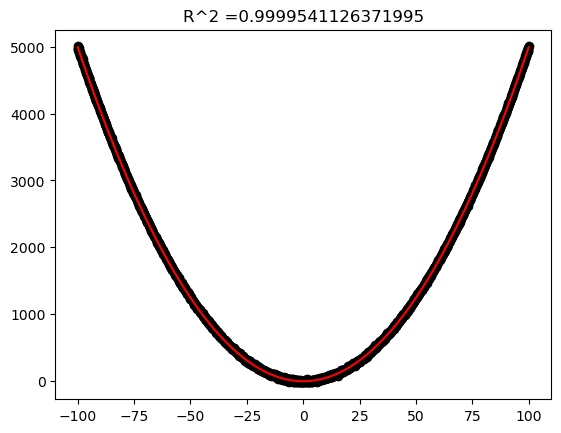

In [12]:
r_sq = eqns.r_squared(x_data, y_data, model_f, *popt) # asterick allows to unpack a tuple and pass as argument
plt.scatter(x_data, y_data, color='black')
plt.plot(x_model, y_model, color='red')
plt.title(f'R^2 ={r_sq}')
plt.show()

One method of solving the least squares problem uses linear algebra and so-called normal equations...